# Chapter 2


In [29]:
import os
import tarfile
from six.moves import urllib

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


In [ ]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()
        
fetch_housing_data()

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [31]:
housing_data = load_housing_data()
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [32]:
housing_data.info()
#float means decimal number
#object means theres a string most likely categorical  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

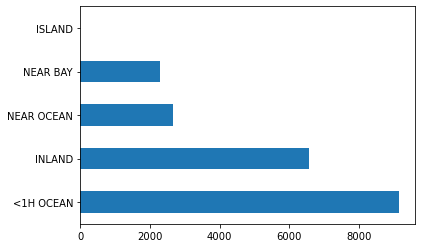

In [34]:
housing_data['ocean_proximity'].value_counts().plot(kind='barh')
#horizontal bar are great to visualize than vertical datasets so barh does the trick where as bar will give us vertical by default.

In [35]:
#statistical measures on all of numerical categorical, so ocean proximity hatuna apa
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#the median income was named by the domain experts to be one of impactful features.
housing_data['median_income'].hist()

In [36]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                   bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                   labels=[1, 2, 3, 4, 5])
housing_data["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

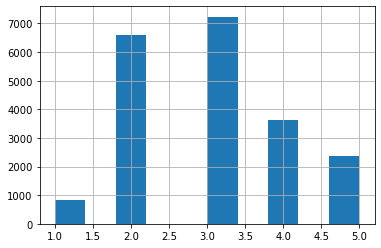

In [37]:
housing_data["income_cat"].hist()

In [38]:
y = housing_data["median_house_value"]
X = housing_data.drop("median_house_value", axis=1)
X


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


# Split Dataset

In [39]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = (train_test_split(X, y, test_size=0.33))
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
2241,-119.81,36.83,10.0,5780.0,922.0,2712.0,883.0,5.6445,INLAND,4
8400,-118.37,33.95,52.0,836.0,175.0,747.0,166.0,4.1250,<1H OCEAN,3
19829,-119.38,36.56,14.0,3965.0,804.0,1945.0,733.0,2.6906,INLAND,2
3184,-119.78,36.30,30.0,1846.0,391.0,1255.0,352.0,2.1681,INLAND,2
12601,-121.48,38.53,37.0,1704.0,361.0,902.0,356.0,1.9837,INLAND,2
...,...,...,...,...,...,...,...,...,...,...
4795,-118.35,34.03,49.0,2334.0,530.0,1334.0,447.0,1.8900,<1H OCEAN,2
18347,-122.16,37.42,34.0,4448.0,610.0,2571.0,581.0,11.0492,NEAR OCEAN,5
2700,-115.37,32.81,32.0,741.0,191.0,623.0,169.0,1.7604,INLAND,2
12899,-121.34,38.63,13.0,3033.0,540.0,1363.0,519.0,4.0036,INLAND,3


<AxesSubplot:>

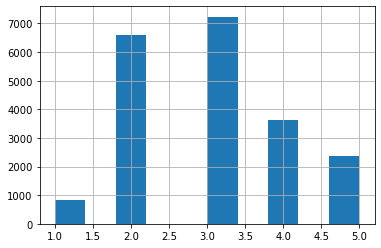

In [40]:
housing_data["income_cat"].hist()


<AxesSubplot:>

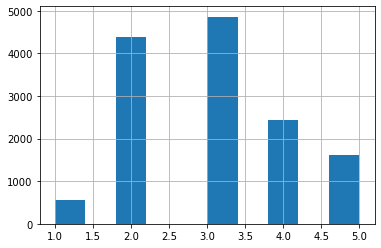

In [41]:
#checking to see if the distribution value is the same for training set compared to the original datasets
#incase this doesnt happen I can use stratified split
X_train["income_cat"].hist()


# Stratified Split

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#splits the data evenly woth respect to income cat
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [43]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [44]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [45]:
housing_data["income_cat"].value_counts() / len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [46]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)
strat_test_set.drop("income_cat", axis="columns", inplace=True)



# Visualizing our Data

In [47]:
housing = strat_train_set.copy()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

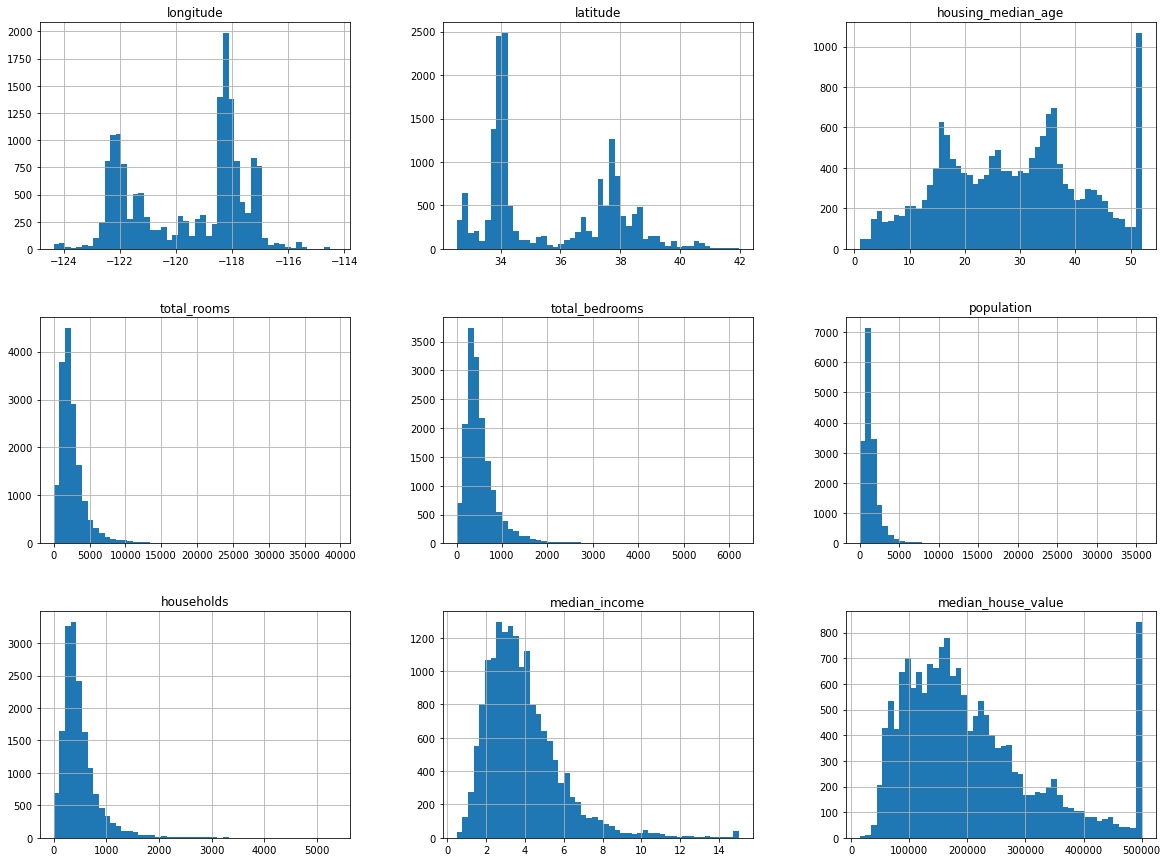

In [48]:
housing.hist(bins=50, figsize=[20, 15])

<AxesSubplot:>

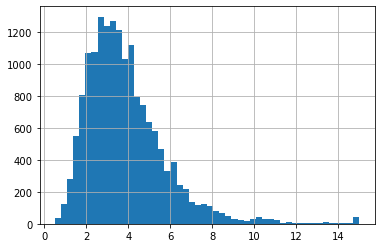

In [49]:
housing['median_income'].hist(bins=50)

## Geographic Data

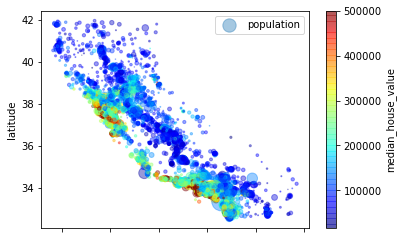

In [50]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Correlation Matrices

In [51]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


<AxesSubplot:>

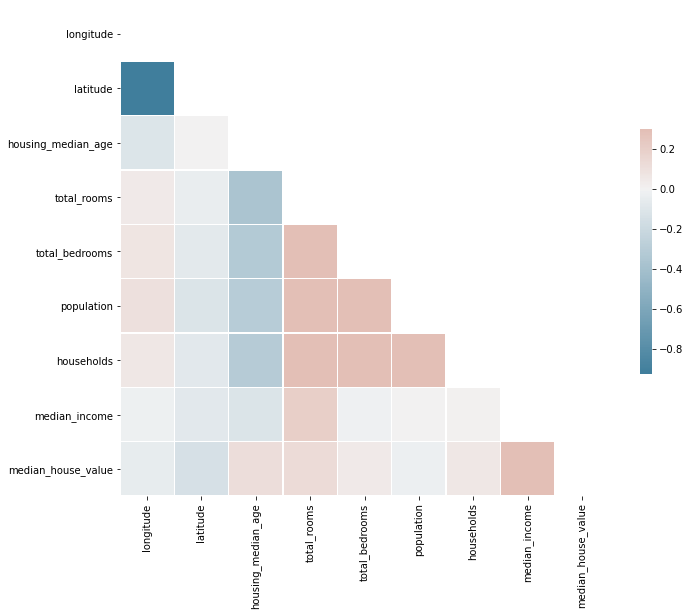

In [60]:
import seaborn as sns

corr = housing.corr()

mask = np.triu(np.ones_like(corr, dtype=bool ))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Preparing Data for Machine Learning

  ### Feature Engineering : 
      -Creating new features (columns) out of our raw data using domain knowledge
  
  ### Imputation
      - Inserting Values where they might be missing to have a complete dataset
  
  ### Encoding Categorical Variables
      - Transforming categorical variables into some numerical variation
  
  ### Scaling
      - Applying a scalar that transforms all of our data on the same numerical scale

In [110]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"]



## Dealing with missing values

In [111]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [112]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) #dropna = rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [113]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) #droping column

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [114]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [115]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [116]:
housing_num = housing.select_dtypes(include=[np.number]) #only numerical values
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [117]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [118]:
X = imputer.transform(housing_num)

housing_transform = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_transform

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [119]:
imputer.strategy

'median'

## Encode Categorical Variables

In [120]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [121]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot #Creates a dense array meaning that all instances have a value not just the ones that are encoded

## Feature Engineering

Feature engineering is the art/science of using domain knowledge to create new features (columns) of data
using raw data. This can be key to improving the perfomance of Machine Learning models.

In [122]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    
    return data

In [123]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1.035398,2.094395,4.625369
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0.955752,2.707965,6.008850
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,1.019481,2.025974,4.225108
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1.050992,4.135977,5.232295
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1.042379,3.047847,4.505810
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,1.123810,2.728571,6.052381
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,1.139535,4.077519,4.635659
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,1.139869,2.742484,6.346405
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,1.067416,3.808989,5.505618


## Scaling our Data

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.12461343,
        -0.08649871, -0.31205452],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.28097679,
        -0.03353391,  0.21768338],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.15586354,
        -0.09240499, -0.46531516],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.08048715,
        -0.03055414,  0.3469342 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.06175575,
         0.06150916,  0.02499488],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.0619974 ,
        -0.09586294, -0.22852947]])

# Pipelines
 
 Pipelines are a feature built into sklearn that allow us to easily apply a number of transformations one after another.
 Shashank Kalanithi approach

In [127]:
def data_transformation(data):
    
    ### Separate labels if they Exist ###
    
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
    else:
        labels = None
        
    ### feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # creating a list of our features for our future use
    
    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")
    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)
    
    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])
    
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity")
    
    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    housing_scaled = scaler.fit_transform(imputed)
    
    ### Concatenating all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])
    
    return output, labels, features

# Select and Train Model

In [130]:
train_data, train_labels, features = data_transformation(strat_train_set)
train_data

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [131]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [135]:
test_data, test_labels, features = data_transformation(strat_test_set)
test_data

array([[ 0.57471497, -0.69620912,  0.03285951, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83839441, -0.86074221,  0.82471029, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24635944, -0.65390061, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52496413, -0.66800344,  0.19122966, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.10704893, -0.75732141, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31601062,  0.55894333, -0.75899128, ...,  0.        ,
         0.        ,  0.        ]])

## Linear Regression

In [138]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [139]:
original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predicted_values})
comparison_dataframe ["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,421413.363329,78587.636671
10970,240300.0,260227.976280,-19927.976280
20351,218200.0,226814.811944,-8614.811944
6568,182100.0,202785.858376,-20685.858376
13285,121300.0,165947.558618,-44647.558618


In [141]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

42587.94451069388

In [143]:
 # Bring in the metrics
    
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

34492.768377694505

## Decision Tree Regressor

In [147]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [148]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

## Cross Validation

In [154]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([71651.73681115, 68908.88378904, 69837.95849446, 74273.12571063,
       70569.16041628, 74723.14094394, 70439.52867477, 69259.50811177,
       78240.7656732 , 69561.76956763])

In [156]:
def display_score(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
display_score(tree_rmse_scores)

Scores: [71651.73681115 68908.88378904 69837.95849446 74273.12571063
 70569.16041628 74723.14094394 70439.52867477 69259.50811177
 78240.7656732  69561.76956763]
Mean: 71746.55781928787
Standard Deviation: 2884.0209802819504


## Random Forest Regressor

In [158]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [159]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18678.183211366006

In [162]:
#cross validation on random forest regressor
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)


Scores: [49754.35067065 47346.47090242 50117.76189514 52857.98783162
 49610.47368883 53551.91042057 49107.02232839 47840.95359996
 53363.70234564 50520.06375328]
Mean: 50407.06974365081
Standard Deviation: 2084.1812169852983


In [164]:
display_score(forest_rmse_scores)

Scores: [49754.35067065 47346.47090242 50117.76189514 52857.98783162
 49610.47368883 53551.91042057 49107.02232839 47840.95359996
 53363.70234564 50520.06375328]
Mean: 50407.06974365081
Standard Deviation: 2084.1812169852983


In [167]:
scores = cross_val_score(forest_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()


count       10.000000
mean     50407.069744
std       2196.919901
min      47346.470902
25%      49232.885169
50%      49936.056283
75%      52273.506812
max      53551.910421
dtype: float64

## Fine-Tuning the Model

After you pick a model or set of models that are promising, you'll need to fine-tune the hyperparameters 
(parameters of the model that aren't affected by training) in order to find the best ones to use for your model.
You can use something called Grid Search in order to accomplish this

In [168]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    #try 12 (3*4) combinations of hyperparameters
    { "n_estimators":[3, 10, 30], "max_features":[2, 4, 6, 8]},
    
    #then try 6 (2*3) combinations with bootstrap set as False
    {"bootstrap": [False], "n_estimators":[3, 10], "max_features": [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
#train across 5 folds that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [171]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [172]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [173]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64796.29671399816 {'max_features': 2, 'n_estimators': 3}
55775.16268850132 {'max_features': 2, 'n_estimators': 10}
53249.85197335964 {'max_features': 2, 'n_estimators': 30}
61138.14355385365 {'max_features': 4, 'n_estimators': 3}
52863.07424277029 {'max_features': 4, 'n_estimators': 10}
50407.76890205031 {'max_features': 4, 'n_estimators': 30}
58164.54455183473 {'max_features': 6, 'n_estimators': 3}
52152.13119714364 {'max_features': 6, 'n_estimators': 10}
49930.745353171194 {'max_features': 6, 'n_estimators': 30}
58193.17858193583 {'max_features': 8, 'n_estimators': 3}
52149.918210044154 {'max_features': 8, 'n_estimators': 10}
49547.47082113679 {'max_features': 8, 'n_estimators': 30}
63033.39486799303 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54575.277358618645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58515.25644925327 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52081.57821584743 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [174]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065624,0.006627,0.003597,0.000481,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.033145e+09,-4.216802e+09,...,-4.198560e+09,9.656402e+07,18,-1.156359e+09,-1.086126e+09,-1.179434e+09,-1.232901e+09,-1.122620e+09,-1.155488e+09,4.991685e+07
1,0.214967,0.019896,0.012042,0.002962,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.850059e+09,-3.263461e+09,...,-3.110869e+09,1.534865e+08,11,-5.897121e+08,-5.684097e+08,-5.849390e+08,-5.899852e+08,-5.746099e+08,-5.815312e+08,8.603367e+06
2,0.632053,0.028563,0.026792,0.005619,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.600753e+09,-2.982751e+09,...,-2.835547e+09,1.754162e+08,9,-4.469698e+08,-4.340389e+08,-4.381881e+08,-4.418626e+08,-4.265185e+08,-4.375156e+08,6.953489e+06
3,0.103044,0.009694,0.003841,0.003637,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.415646e+09,-3.800466e+09,...,-3.737873e+09,1.708007e+08,16,-9.841236e+08,-9.532705e+08,-1.042962e+09,-1.060888e+09,-9.435309e+08,-9.969549e+08,4.718291e+07
4,0.320102,0.014799,0.012711,0.002513,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.659842e+09,-2.874472e+09,...,-2.794505e+09,8.887037e+07,8,-5.230004e+08,-5.096829e+08,-5.065158e+08,-5.372295e+08,-5.064914e+08,-5.165840e+08,1.198549e+07
5,0.964749,0.007421,0.027733,0.003888,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.381173e+09,-2.618105e+09,...,-2.540943e+09,1.257149e+08,3,-3.887976e+08,-3.832867e+08,-3.850775e+08,-4.035270e+08,-3.821878e+08,-3.885753e+08,7.805208e+06
6,0.128110,0.007886,0.003627,0.004489,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.062387e+09,-3.441023e+09,...,-3.383114e+09,1.705490e+08,12,-8.649995e+08,-8.643093e+08,-9.099060e+08,-9.282465e+08,-9.060524e+08,-8.947027e+08,2.565613e+07
7,0.448103,0.028603,0.011320,0.003216,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.547701e+09,-2.759930e+09,...,-2.719845e+09,1.324912e+08,7,-4.945902e+08,-4.916454e+08,-4.935797e+08,-5.032370e+08,-5.059995e+08,-4.978103e+08,5.705876e+06
8,1.350529,0.044410,0.024104,0.008976,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.334794e+09,-2.551722e+09,...,-2.493079e+09,1.502788e+08,2,-3.789610e+08,-3.742746e+08,-3.790410e+08,-3.801853e+08,-3.789293e+08,-3.782783e+08,2.056092e+06
9,0.203423,0.018192,0.003426,0.006853,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.349788e+09,-3.698870e+09,...,-3.386446e+09,1.888014e+08,13,-9.185787e+08,-8.937910e+08,-8.289324e+08,-9.110356e+08,-9.119743e+08,-8.928624e+08,3.299928e+07


## Randomized Search


In [180]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018C6E558358>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018C6E558320>},
                   random_state=42, scoring='neg_mean_squared_error')

In [181]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48872.96730239911 {'max_features': 7, 'n_estimators': 180}
51407.61346702038 {'max_features': 5, 'n_estimators': 15}
50440.74137729941 {'max_features': 3, 'n_estimators': 72}
50715.017643468156 {'max_features': 5, 'n_estimators': 21}
48979.26226521618 {'max_features': 7, 'n_estimators': 122}
50429.11256883642 {'max_features': 3, 'n_estimators': 75}
50278.24289394691 {'max_features': 3, 'n_estimators': 88}
49215.51860219781 {'max_features': 5, 'n_estimators': 100}
50163.34567766393 {'max_features': 3, 'n_estimators': 150}
65146.55285210115 {'max_features': 5, 'n_estimators': 2}


In [182]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.734486,0.553601,0.174607,0.024687,7,180,"{'max_features': 7, 'n_estimators': 180}",-2.222713e+09,-2.453240e+09,-2.500979e+09,-2.242176e+09,-2.523726e+09,-2.388567e+09,1.296341e+08,1
1,0.624115,0.038635,0.015418,0.002776,5,15,"{'max_features': 5, 'n_estimators': 15}",-2.452264e+09,-2.650716e+09,-2.770203e+09,-2.503565e+09,-2.836966e+09,-2.642743e+09,1.481115e+08,9
2,2.072175,0.102913,0.065169,0.006327,3,72,"{'max_features': 3, 'n_estimators': 72}",-2.368257e+09,-2.683490e+09,-2.588486e+09,-2.413089e+09,-2.668020e+09,-2.544268e+09,1.302618e+08,7
3,0.925796,0.064434,0.021753,0.002368,5,21,"{'max_features': 5, 'n_estimators': 21}",-2.419441e+09,-2.624277e+09,-2.691363e+09,-2.392438e+09,-2.732546e+09,-2.572013e+09,1.401942e+08,8
4,6.908149,0.276753,0.112648,0.008967,7,122,"{'max_features': 7, 'n_estimators': 122}",-2.230170e+09,-2.463127e+09,-2.514789e+09,-2.249429e+09,-2.537326e+09,-2.398968e+09,1.323093e+08,2
5,2.095671,0.047805,0.066352,0.007894,3,75,"{'max_features': 3, 'n_estimators': 75}",-2.365483e+09,-2.675678e+09,-2.592608e+09,-2.414100e+09,-2.667608e+09,-2.543095e+09,1.293978e+08,6
6,2.572097,0.247420,0.081472,0.011265,3,88,"{'max_features': 3, 'n_estimators': 88}",-2.352876e+09,-2.654710e+09,-2.585606e+09,-2.392172e+09,-2.654146e+09,-2.527902e+09,1.299264e+08,5
7,4.387612,0.152836,0.102318,0.005816,5,100,"{'max_features': 5, 'n_estimators': 100}",-2.263398e+09,-2.473760e+09,-2.531970e+09,-2.267619e+09,-2.574089e+09,-2.422167e+09,1.318267e+08,3
8,4.254664,0.155971,0.140765,0.024968,3,150,"{'max_features': 3, 'n_estimators': 150}",-2.347175e+09,-2.617941e+09,-2.597091e+09,-2.373136e+09,-2.646463e+09,-2.516361e+09,1.287628e+08,4
9,0.076284,0.004608,0.002056,0.003154,5,2,"{'max_features': 5, 'n_estimators': 2}",-4.146067e+09,-4.234840e+09,-4.285910e+09,-4.030179e+09,-4.523371e+09,-4.244073e+09,1.644375e+08,10


In [184]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.27645191e-02, 6.42396403e-02, 4.31625073e-02, 1.59415065e-02,
       1.43511492e-02, 1.53067941e-02, 1.45315454e-02, 3.77190926e-01,
       2.31534220e-02, 1.06333683e-01, 7.28545386e-02, 8.86746054e-03,
       1.67043593e-01, 1.01091754e-04, 1.54638032e-03, 2.61124239e-03])

## Feature Important LIst
Judging the importance of various features is very important as this allows us to explain to our stakeholders which feature is most important and why. which is becoming more important as more advanced models behave like blackboxes

In [186]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.07276451905687747),
 ('latitude', 0.06423964030907003),
 ('housing_median_age', 0.04316250728302085),
 ('total_rooms', 0.0159415064754067),
 ('total_bedrooms', 0.014351149206325242),
 ('population', 0.015306794129914468),
 ('households', 0.014531545444431405),
 ('median_income', 0.37719092616977545),
 ('bedrooms_per_household', 0.023153421979392307),
 ('population_per_household', 0.10633368337710118),
 ('rooms_per_household', 0.07285453862321799),
 ('<1H OCEAN', 0.008867460535337829),
 ('INLAND', 0.16704359295081123),
 ('ISLAND', 0.00010109175397702533),
 ('NEAR BAY', 0.0015463803195537658),
 ('NEAR OCEAN', 0.002611242385787115)]

<BarContainer object of 16 artists>

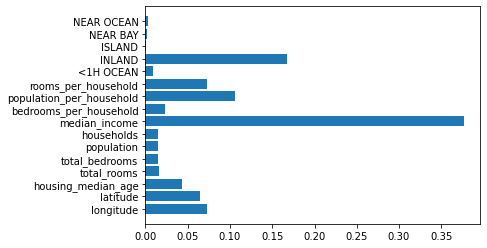

In [188]:
plt.barh(y=features, width=feature_importances.tolist())

In [189]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [190]:
final_rmse

66242.47977049224